### Import libraries:

In [1]:
import numpy as np
import pandas as pd

### Create a class of GridWorld:


In [2]:
class GridWorld:
    def __init__(self):
        self.grid = np.zeros((5, 5))  # grid world represented as a 5x5 matrix
        self.start_state = (4, 0)  # starting state
        self.current_state = self.start_state  # current state
        
        # define terminal states and rewards
        self.terminals = [(0, 1), (0, 3)]
        self.rewards = {(0, 1): -10, (0, 3): 10}
        
    def reset(self):
        """
        Resets the environment to its initial state and returns the state.
        """
        self.current_state = self.start_state
        return self.current_state
    
    def step(self, action):
        """
        Simulates a step in the environment by taking an action and returning the resulting
        state and reward.
        
        action: An integer between 0 and 3 representing the action to take. 0=left, 1=down,
        2=right, 3=up.
        """
        # determine new state based on action
        i, j = self.current_state
        if action == 0:  # left
            j = max(j-1, 0)
        elif action == 1:  # down
            i = min(i+1, 4)
        elif action == 2:  # right
            j = min(j+1, 4)
        elif action == 3:  # up
            i = max(i-1, 0)
        new_state = (i, j)
        
        # determine reward
        reward = 0
        if new_state in self.rewards:
            reward = self.rewards[new_state]
            
        # check if terminal state reached
        done = False
        if new_state in self.terminals:
            done = True
            
        self.current_state = new_state
        return new_state, reward, done
    
    def actions(self, state):
        """
        Returns a list of executable actions in a given state.
        
        state: A tuple representing the state in the grid world.
        """
        i, j = state
        possible_actions = [0, 1, 2, 3]
        if i == 0:
            possible_actions.remove(3)
        elif i == 4:
            possible_actions.remove(1)
        if j == 0:
            possible_actions.remove(0)
        elif j == 4:
            possible_actions.remove(2)
        return possible_actions


In [3]:
env = GridWorld()
actions = [2, 3, 2, 2, 3, 0, 3,2,2,3,0]
for action in actions:
    state, reward, done = env.step(action)
    print("Action: {}, Next state: {}, Reward: {}, Done: {}".format(action, state, reward, done))


Action: 2, Next state: (4, 1), Reward: 0, Done: False
Action: 3, Next state: (3, 1), Reward: 0, Done: False
Action: 2, Next state: (3, 2), Reward: 0, Done: False
Action: 2, Next state: (3, 3), Reward: 0, Done: False
Action: 3, Next state: (2, 3), Reward: 0, Done: False
Action: 0, Next state: (2, 2), Reward: 0, Done: False
Action: 3, Next state: (1, 2), Reward: 0, Done: False
Action: 2, Next state: (1, 3), Reward: 0, Done: False
Action: 2, Next state: (1, 4), Reward: 0, Done: False
Action: 3, Next state: (0, 4), Reward: 0, Done: False
Action: 0, Next state: (0, 3), Reward: 10, Done: True


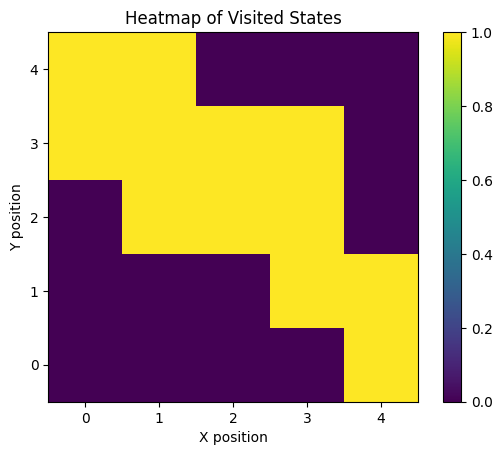

In [5]:
import matplotlib.pyplot as plt
# Initialize the environment
env = GridWorld()

# Define the actions
actions = [2, 3, 2, 2, 3, 0, 3, 2, 2, 3, 0]

# Keep track of the visited states
visited_states = [env.current_state]

# Take each action and record the state
for action in actions:
    state, reward, done = env.step(action)
    visited_states.append(state)

# Create a heatmap of the visited states
x = [state[0] for state in visited_states]
y = [state[1] for state in visited_states]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(np.max(x)-np.min(x)+1, np.max(y)-np.min(y)+1))
extent = [np.min(x)-0.5, np.max(x)+0.5, np.min(y)-0.5, np.max(y)+0.5]
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.title('Heatmap of Visited States')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

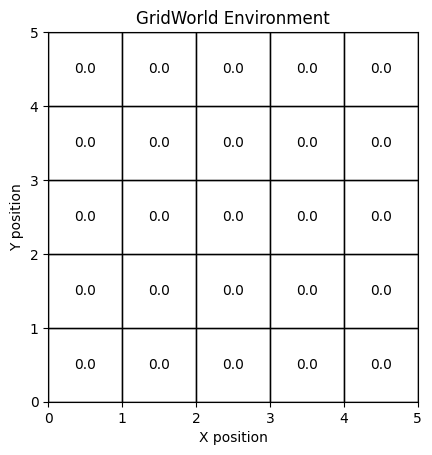

In [8]:
# Initialize the environment
env = GridWorld()

# Define the actions
actions = [2, 3, 2, 2, 3, 0, 3, 2, 2, 3, 0]

# Plot the environment
fig, ax = plt.subplots()
for i in range(env.grid.shape[0]):
    for j in range(env.grid.shape[1]):
        if env.grid[i][j] == -1:
            ax.fill([i, i, i+1, i+1], [j, j+1, j+1, j], color='gray')
        else:
            ax.fill([i, i, i+1, i+1], [j, j+1, j+1, j], color='white', edgecolor='gray')
            ax.text(i+0.5, j+0.5, str(env.grid[i][j]), ha='center', va='center')
ax.set_xlim(0, env.grid.shape[0])
ax.set_ylim(0, env.grid.shape[1])
ax.set_xticks(range(env.grid.shape[0]+1))
ax.set_yticks(range(env.grid.shape[1]+1))
ax.grid(color='black', linestyle='-', linewidth=1)
ax.set_aspect('equal')
plt.title('GridWorld Environment')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

### Blackjack Environment

In [1]:
import gym
import numpy as np
# Create the Blackjack environment
env = gym.make("Blackjack-v1")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [2]:
# Set the discount factor and learning rate
discount_factor = 0.9
learning_rate = 0.1

# Initialize the Q-table
Q = np.zeros((32, 11, 2, 2))

# Set the number of episodes to run
num_episodes = 100_000

# Set the maximum number of steps per episode
max_steps_per_episode = 50

# Set the exploration rate
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Train the agent
for episode in range(num_episodes):
    # Reset the environment and get the initial state
    state = env.reset()
    # print("state = ", state)
    done = False
    rewards_current_episode = 0

    # Loop through the game until it's finished
    for step in range(max_steps_per_episode):
        # Choose an action
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(Q[state[0], state[1],int(state[2])])
        else:
            action = env.action_space.sample()

        # Take the action and observe the result
        next_state, reward, done, _ = env.step(action)

        # Update the Q-table
        Q[state[0],state[1],int(state[2]),action] = (1 - learning_rate) * Q[state[0],state[1],int(state[2]),action] + learning_rate * (reward + discount_factor * np.max(Q[next_state[0],next_state[1],int(next_state[2])]))

        state = next_state
        rewards_current_episode += reward

        if done:
            break

    # Update the exploration rate
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

In [3]:
import time
# Test the agent
for episode in range(3):
    # Reset the environment and get the initial state
    state = env.reset()
    done = False
    print("***** EPISODE", episode+1, "*****\n")
    time.sleep(1)

    # Loop through the game until it's finished
    while not done:
        print(f"State: {state}")
        # Choose an action
        action = np.argmax(Q[state[0], state[1], int(state[2])])
        
        print(f"Action: {action}")

        # Take the action and observe the result
        next_state, reward, done, _ = env.step(action)
        
        print(f"Next State: {next_state}")

        print(f"Reward: {reward}")
    print("\n")

***** EPISODE 1 *****

State: (16, 9, False)
Action: 1
Next State: (18, 9, False)
Reward: 0.0
State: (16, 9, False)
Action: 1
Next State: (22, 9, False)
Reward: -1.0


***** EPISODE 2 *****

State: (8, 2, False)
Action: 1
Next State: (13, 2, False)
Reward: 0.0
State: (8, 2, False)
Action: 1
Next State: (20, 2, False)
Reward: 0.0
State: (8, 2, False)
Action: 1
Next State: (21, 2, False)
Reward: 0.0
State: (8, 2, False)
Action: 1
Next State: (29, 2, False)
Reward: -1.0


***** EPISODE 3 *****

State: (15, 10, False)
Action: 1
Next State: (25, 10, False)
Reward: -1.0




In [10]:
import random

class BlackJack:
    def __init__(self):
        self.deck = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11] * 4 # 52-card deck
        self.dealer_hand = []
        self.player_hand = []
        self.done = False

    def draw_card(self):
        return self.deck.pop(random.randint(0, len(self.deck)-1))

    def get_hand_value(self, hand):
        sum = 0
        has_usable_ace = False
        for card in hand:
            sum += card
            if card == 11:
                has_usable_ace = True
        while sum > 21 and has_usable_ace:
            sum -= 10
            has_usable_ace = False
        return sum, has_usable_ace

    def reset(self):
        self.deck = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11] * 4
        self.dealer_hand = [self.draw_card(), self.draw_card()]
        self.player_hand = [self.draw_card(), self.draw_card()]
        self.done = False
        return self.get_state()

    def get_state(self):
        return (self.dealer_hand[0],) + self.get_hand_value(self.player_hand)

    def step(self, action):
        if action == 'hit':
            self.player_hand.append(self.draw_card())
            player_value, usable_ace = self.get_hand_value(self.player_hand)
            if player_value > 21:
                reward = -1
                self.done = True
            else:
                reward = 0
        elif action == 'stand':
            self.done = True
            player_value, usable_ace = self.get_hand_value(self.player_hand)
            while self.get_hand_value(self.dealer_hand)[0] < 17:
                self.dealer_hand.append(self.draw_card())
            dealer_value, _ = self.get_hand_value(self.dealer_hand)
            if dealer_value > 21 or player_value > dealer_value:
                reward = 1
            elif player_value == dealer_value:
                reward = 0
            else:
                reward = -1
        return self.get_state(), reward, self.done


In [12]:
env = BlackJack()
state = env.reset()
done = False
while not done:
    print("Player hand:", env.player_hand)
    print("Dealer up card:", env.dealer_hand[0])
    action = input("Enter 'hit' or 'stand': ")
    state, reward, done = env.step(action)
    print("State:", state)
    print("Reward:", reward)
    if done:
        print("Game over")


Player hand: [11, 9]
Dealer up card: 11
Enter 'hit' or 'stand': hit
State: (11, 19, False)
Reward: 0
Player hand: [11, 9, 9]
Dealer up card: 11
Enter 'hit' or 'stand': stand
State: (11, 19, False)
Reward: -1
Game over
